<font size="5">Project 2 House Prices (Regression) </font>


In [2]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

<font size="4">Data Import and Cleaning </font>


In [2]:
# pip install pandas-profiling # desc = ('data_description.txt', sep='|', )

In [3]:
pd.set_option('display.maXrows', 500)
pd.set_option('display.maXcolumns', 500)

OptionError: "No such keys(s): 'display.maXrows'"

In [4]:
house_train = pd.read_csv('train.csv', sep=',')
house_test = pd.read_csv('test.csv', sep=',')
house_test.shape

(1459, 80)

In [5]:
house_test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
house_train.shape

(1460, 81)

In [7]:
house_df = pd.concat([house_train, house_test], join='inner', ignore_index=True)


In [8]:
house_df.shape

(2919, 80)

In [9]:
y = house_train.SalePrice
house_df.drop('Id', axis=1, inplace=True)

In [10]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [11]:
house_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [12]:
house_df.shape

(2919, 79)

In [13]:
house_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [14]:
house_df.isna().sum().sort_values(ascending=False)

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
FireplaceQu    1420
               ... 
1stFlrSF          0
CentralAir        0
Heating           0
Foundation        0
MSSubClass        0
Length: 79, dtype: int64

In [15]:
# We drop the below features because we found the majority of their classes belong to one class (will be useless) 
house_df =house_df.drop(columns=['Alley', 'MSZoning', 'Street', 'LandContour', 'Utilities', 
                                       'LandSlope', 'Condition1', 'Condition2','3SsnPorch','Fence', 'SaleCondition',
                                       'PoolQC','MiscVal', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'GarageCond',
                                       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
                                       'Functional', 'RoofMatl', 'BsmtCond', 'BsmtFinSF2', 'Heating'])

In [16]:
#iddd

In [17]:
house_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
0,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,...,2.0,548.0,TA,Y,0,61,0,2,2008,WD
1,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,...,2.0,460.0,TA,Y,298,0,0,5,2007,WD
2,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,...,2.0,608.0,TA,Y,0,42,0,9,2008,WD
3,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,...,3.0,642.0,TA,Y,0,35,272,2,2006,WD
4,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,...,3.0,836.0,TA,Y,192,84,0,12,2008,WD


In [18]:
house_df.shape

(2919, 52)

In [19]:
# house_df.corr()['SalePrice']

In [20]:
house_df.dtypes.sort_values() #check data type 

MSSubClass         int64
1stFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
YearBuilt          int64
YearRemodAdd       int64
OverallQual        int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
LotArea            int64
MoSold             int64
OverallCond        int64
YrSold             int64
TotalBsmtSF      float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
BsmtFullBath     float64
BsmtUnfSF        float64
LotFrontage      float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinType2      object
LotShape          object
LotConfig         object
Neighborhood      object
PavedDrive        object
GarageQual        object
BldgType          object
HouseStyle        object
GarageFinish      object
RoofStyle         object
GarageType        object
Exterior1st       object
Exterior2nd       object


<font size="4"> Fill the null valu & outlier & changinig data type </font>

In [21]:
#convert float into int and fill the null with zero 
house_df['GarageYrBlt'].fillna(0,inplace=True)
house_df['GarageYrBlt'].astype(int)

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
2914       0
2915    1970
2916    1960
2917       0
2918    1993
Name: GarageYrBlt, Length: 2919, dtype: int64

In [22]:
house_df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
0,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,...,2.0,548.0,TA,Y,0,61,0,2,2008,WD
1,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,...,2.0,460.0,TA,Y,298,0,0,5,2007,WD
2,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,...,2.0,608.0,TA,Y,0,42,0,9,2008,WD
3,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,...,3.0,642.0,TA,Y,0,35,272,2,2006,WD
4,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,...,3.0,836.0,TA,Y,192,84,0,12,2008,WD


In [23]:
#convert to object 
house_df.MSSubClass = house_df.MSSubClass.astype(object)

In [24]:
# We fill below nulls because all nulls mean (There is no Basement)
house_df['MasVnrType']=house_df['MasVnrType'].fillna('No Basement')
house_df['BsmtExposure']=house_df['BsmtExposure'].fillna('No Basement')
house_df['BsmtFinType1']=house_df['BsmtFinType1'].fillna('No Basement')
house_df['BsmtFinType2']=house_df['BsmtFinType2'].fillna('No Basement')
house_df['MasVnrArea']=house_df['MasVnrArea'].fillna(0) 
house_df['BsmtQual']=house_df['BsmtQual'].fillna('None')

In [25]:
house_df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [26]:
house_df['GarageQual'].isnull().sum()

159

In [27]:
house_df['GarageType'].unique() #null here = no garage 

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [28]:
# We fill below nulls because all nulls mean (There is no Garage)

house_df['GarageType']=house_df['GarageType'].fillna("No Garage")
house_df['GarageQual']=house_df['GarageQual'].fillna('No Garage')
house_df['GarageFinish']=house_df['GarageFinish'].fillna('No Garage')

In [29]:
house_df['FireplaceQu'].unique()#null here = No Fireplace

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [30]:
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna("No Fireplace")  

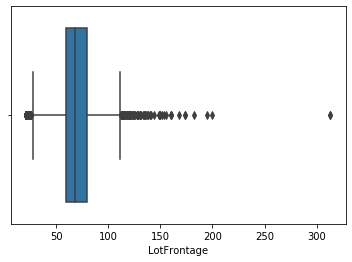

In [31]:
sns.boxplot(house_df.LotFrontage);

In [32]:
# sns.scatterplot(house_train.LotFrontage, house_train.SalePrice);

In [33]:
house_df[house_df['LotFrontage'] > 300]

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
934,20,313.0,27650,IR2,Inside,NAmes,1Fam,1Story,7,7,...,2.0,505.0,TA,Y,0,0,0,11,2008,WD
1298,60,313.0,63887,IR3,Corner,Edwards,1Fam,2Story,10,5,...,2.0,1418.0,TA,Y,214,292,0,1,2008,New


# We drop the outliers which are over 300 to replace the nulls with median
house_df.drop(house_df[house_df['LotFrontage'] > 300].index, axis=0, inplace=True)

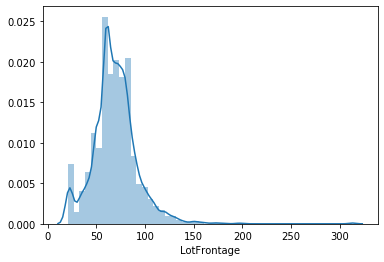

In [34]:
sns.distplot(house_df.LotFrontage.dropna())


In [35]:
house_df.LotFrontage.isna().sum()

486

In [36]:
# We fill the missing values of LotFrontage by the median after we remove the outliers
house_df.LotFrontage.fillna(np.median(house_df.LotFrontage.dropna()), inplace=True)

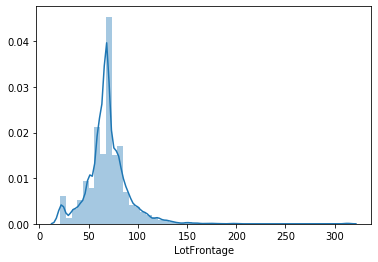

In [37]:
sns.distplot(house_df.LotFrontage)

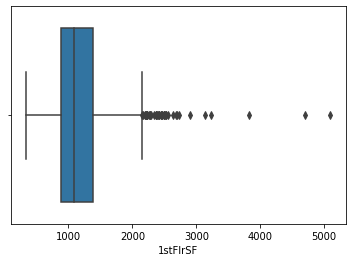

In [38]:
sns.boxplot(house_df['1stFlrSF']);

In [39]:
# sns.scatterplot(x = house_df['1stFlrSF'], y = house_df.SalePrice); #outlier only one in row 

In [40]:
house_df[house_df['1stFlrSF']>4000]

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
1298,60,313.0,63887,IR3,Corner,Edwards,1Fam,2Story,10,5,...,2.0,1418.0,TA,Y,214,292,0,1,2008,New
2549,20,128.0,39290,IR1,Inside,Edwards,1Fam,1Story,10,5,...,3.0,1154.0,TA,Y,546,484,0,10,2007,New


# We drop the outlier which is over 4000 
house_df['1stFlrSF'].drop(house_df[house_df['1stFlrSF'] > 4000].index, axis=0 , inplace=True)

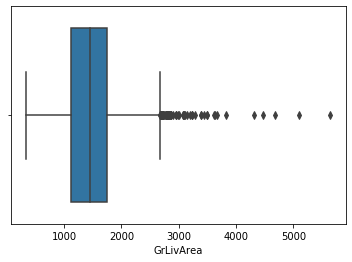

In [41]:
sns.boxplot(house_df['GrLivArea']); #outlier only in 4 row

In [42]:
# sns.scatterplot(x = house_df.GrLivArea, y = house_df.SalePrice);

In [43]:
house_df[house_df['GrLivArea']>4000]

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
523,60,130.0,40094,IR1,Inside,Edwards,1Fam,2Story,10,5,...,3.0,884.0,TA,Y,208,406,0,10,2007,New
691,60,104.0,21535,IR1,Corner,NoRidge,1Fam,2Story,10,6,...,3.0,832.0,TA,Y,382,50,0,1,2007,WD
1182,60,160.0,15623,IR1,Corner,NoRidge,1Fam,2Story,10,5,...,3.0,813.0,TA,Y,171,78,0,7,2007,WD
1298,60,313.0,63887,IR3,Corner,Edwards,1Fam,2Story,10,5,...,2.0,1418.0,TA,Y,214,292,0,1,2008,New
2549,20,128.0,39290,IR1,Inside,Edwards,1Fam,1Story,10,5,...,3.0,1154.0,TA,Y,546,484,0,10,2007,New


In [44]:
# Check later
# house_df['GrLivArea'].drop(house_df[house_df['GrLivArea']>4000].index, axis=0 , inplace=True)

In [45]:
house_df.shape

(2919, 52)

In [46]:
house_df.iloc[1460:,:]

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
1460,20,80.0,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,...,1.0,730.0,TA,Y,140,0,0,6,2010,WD
1461,20,81.0,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,...,1.0,312.0,TA,Y,393,36,0,6,2010,WD
1462,60,74.0,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,...,2.0,482.0,TA,Y,212,34,0,3,2010,WD
1463,60,78.0,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,...,2.0,470.0,TA,Y,360,36,0,6,2010,WD
1464,120,43.0,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,...,2.0,506.0,TA,Y,0,82,0,1,2010,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,...,0.0,0.0,No Garage,Y,0,0,0,6,2006,WD
2915,160,21.0,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,...,1.0,286.0,TA,Y,0,24,0,4,2006,WD
2916,20,160.0,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,...,2.0,576.0,TA,Y,474,0,0,9,2006,WD
2917,85,62.0,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,...,0.0,0.0,No Garage,Y,80,32,0,7,2006,WD


In [47]:
house_df.isna().sum().sort_values(ascending=False)

BsmtFullBath     2
SaleType         1
GarageCars       1
Exterior1st      1
Exterior2nd      1
BsmtFinSF1       1
TotalBsmtSF      1
KitchenQual      1
BsmtUnfSF        1
GarageArea       1
YearBuilt        0
ExterCond        0
ExterQual        0
MasVnrArea       0
MasVnrType       0
EnclosedPorch    0
MoSold           0
RoofStyle        0
YearRemodAdd     0
OverallCond      0
BsmtQual         0
OverallQual      0
HouseStyle       0
BldgType         0
Neighborhood     0
LotConfig        0
LotShape         0
LotArea          0
LotFrontage      0
Foundation       0
BsmtExposure     0
GarageFinish     0
FullBath         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
TotRmsAbvGrd     0
GarageQual       0
BedroomAbvGr     0
HalfBath         0
PavedDrive       0
BsmtFinType1     0
GrLivArea        0
1stFlrSF         0
CentralAir       0
HeatingQC        0
WoodDeckSF       0
YrSold           0
BsmtFinType2     0
OpenPorchSF      0
MSSubClass       0
dtype: int64

In [48]:
na_columns = ['BsmtFullBath', 'SaleType', 'GarageCars', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'TotalBsmtSF', 
              'KitchenQual', 'BsmtUnfSF', 'GarageArea']
def fill_na(list_of_columns):
    '''
    This function is for fill na values with median if the datatype is int or float and mode if datatype is object.
    '''
    for i in na_columns:
        if house_df[i].dtype == 'float64':
            house_df[i] = house_df[i].fillna(house_df[i].median())

        elif house_df[i].dtype == 'object':
            house_df[i] = house_df[i].fillna(house_df[i].mode()[0])

        elif house_df[i].dtype == 'int64':
            house_df[i] = house_df[i].fillna(house_df[i].median())

In [49]:
fill_na(na_columns)

In [50]:
house_df_ = pd.get_dummies(house_df, drop_first=True)

In [51]:
house_df_

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,...,0,1,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,...,0,1,0,0,0,0,0,0,0,1
2,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,...,0,1,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,...,0,1,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0,1,0,0,0,0,0,0,0,1
2915,21.0,1894,4,5,1970,1970,0.0,252.0,294.0,546.0,...,0,1,0,0,0,0,0,0,0,1
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,1224.0,...,0,1,0,0,0,0,0,0,0,1
2917,62.0,10441,5,5,1992,1992,0.0,337.0,575.0,912.0,...,0,1,0,0,0,0,0,0,0,1


In [52]:
X = house_df_.iloc[0:1460,:]


In [53]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [54]:
# y = y[:1460]

In [55]:
X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,0,1,0,0,0,0,0,0,0,1
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,0,1,0,0,0,0,0,0,0,1
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,0,1,0,0,0,0,0,0,0,1
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,0,1,0,0,0,0,0,0,0,1
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,0,1,0,0,0,0,0,0,0,1


In [56]:
# X = X[0:1459]

In [57]:
X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,0,1,0,0,0,0,0,0,0,1
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,0,1,0,0,0,0,0,0,0,1
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,0,1,0,0,0,0,0,0,0,1
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,0,1,0,0,0,0,0,0,0,1
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,0,1,0,0,0,0,0,0,0,1


In [58]:
X.shape

(1460, 190)

In [59]:
X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,0,1,0,0,0,0,0,0,0,1
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,0,1,0,0,0,0,0,0,0,1
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,0,1,0,0,0,0,0,0,0,1
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,0,1,0,0,0,0,0,0,0,1
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,0,1,0,0,0,0,0,0,0,1


In [60]:
# house_df['SaleType'].mode()[0]

In [61]:
h_test = house_df_.iloc[1460:,:]

In [62]:
h_test.shape

(1459, 190)

In [63]:
h_test.isna().sum().sort_values(ascending=False)

SaleType_WD             0
Neighborhood_NAmes      0
Neighborhood_Somerst    0
Neighborhood_SawyerW    0
Neighborhood_Sawyer     0
                       ..
ExterCond_Fa            0
ExterQual_TA            0
ExterQual_Gd            0
ExterQual_Fa            0
LotFrontage             0
Length: 190, dtype: int64

In [64]:
h_test.dtypes.sort_values(ascending=False)

LotFrontage            float64
BsmtFinSF1             float64
GarageCars             float64
GarageYrBlt            float64
BsmtFullBath           float64
                        ...   
ExterCond_Fa             uint8
ExterQual_TA             uint8
ExterQual_Gd             uint8
ExterQual_Fa             uint8
Exterior1st_ImStucc      uint8
Length: 190, dtype: object

In [65]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,...,0,1,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,...,0,1,0,0,0,0,0,0,0,1
2,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,...,0,1,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,...,0,1,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,...,0,1,0,0,0,0,0,0,0,1


In [66]:
X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,0,1,0,0,0,0,0,0,0,1
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,0,1,0,0,0,0,0,0,0,1
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,0,1,0,0,0,0,0,0,0,1
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,0,1,0,0,0,0,0,0,0,1
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,0,1,0,0,0,0,0,0,0,1


<font size="4">correlation </font>


In [67]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25,10))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    ax.title.set_text('Features Correlation')
    b,t=plt.ylim()
    b  +=.5
    t -=.5
    plt.ylim(b,t)


    plt.show()

In [68]:
# correlation_heat_map(X)

<font size="4">Visualize the data</font>

In [69]:
#plt.subplots(figsize=(12,9))
#sns.distplot(house_df['SalePrice']);

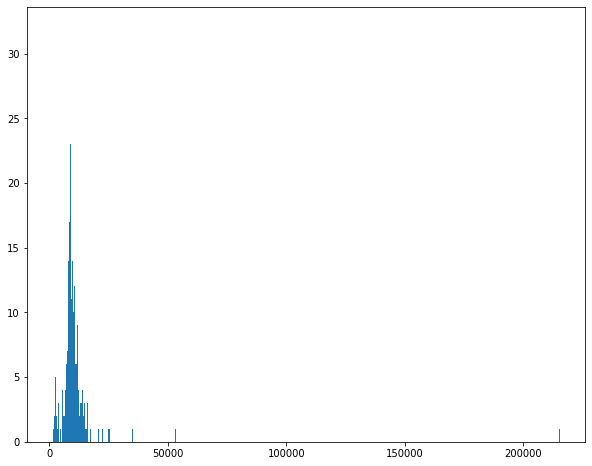

In [70]:
plt.figure(figsize=(10, 8))
plt.hist(X.LotArea, bins=3000);

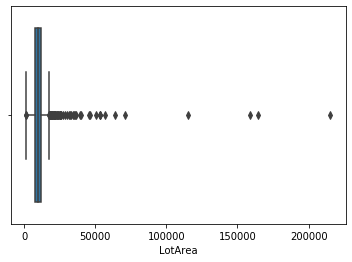

In [71]:
sns.boxplot(X.LotArea)

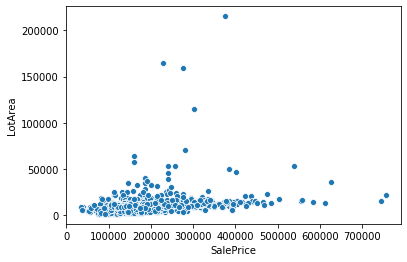

In [72]:
sns.scatterplot(house_train.SalePrice, house_train.LotArea)

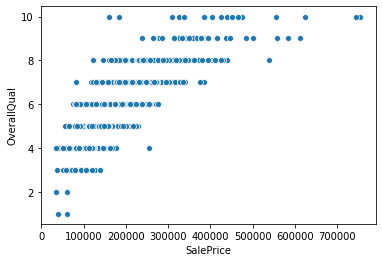

In [73]:
# Categorical
sns.scatterplot(house_train.SalePrice, house_train.OverallQual)


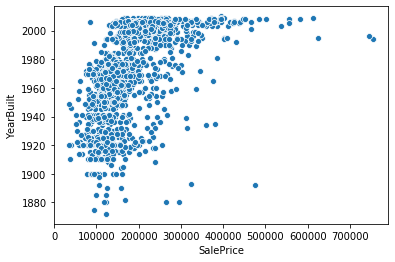

In [74]:
sns.scatterplot(house_train.SalePrice, house_train.YearBuilt)

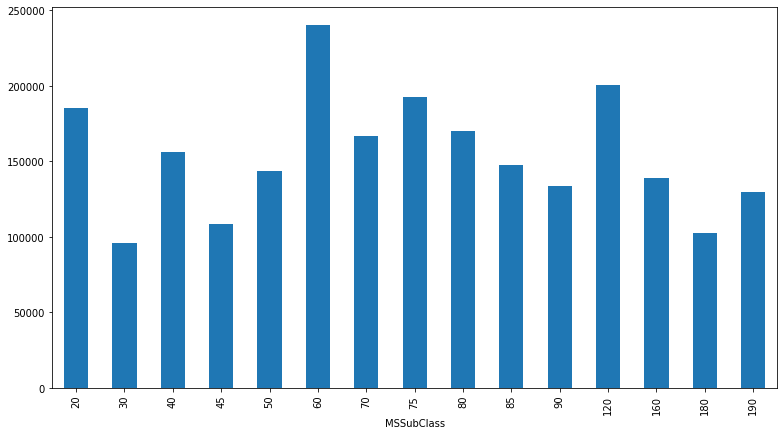

In [75]:
plt.figure(figsize=(13,7))

house_train.groupby('MSSubClass')['SalePrice'].mean().plot(kind='bar')

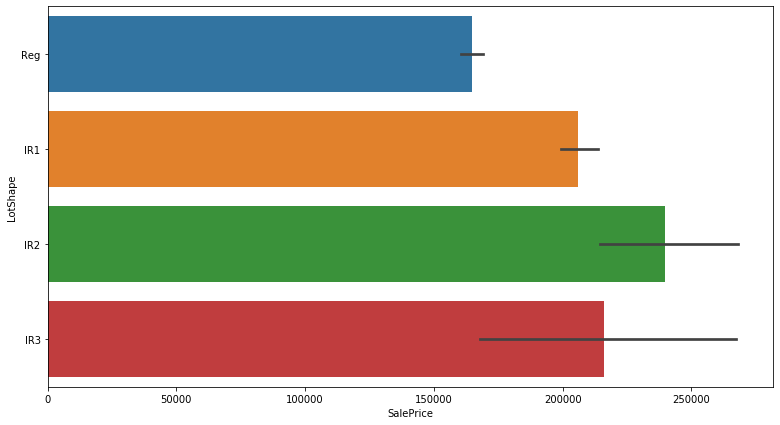

In [76]:
plt.figure(figsize=(13,7))

sns.barplot(house_train.SalePrice, house_train.LotShape)

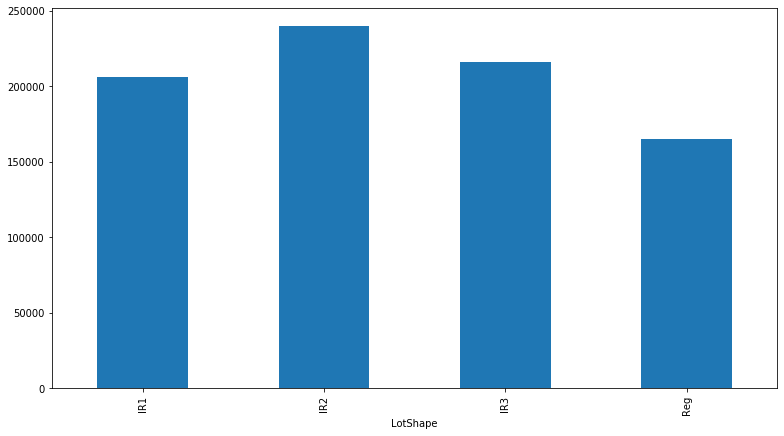

In [77]:
plt.figure(figsize=(13,7))

house_train.groupby('LotShape')['SalePrice'].mean().plot(kind='bar')

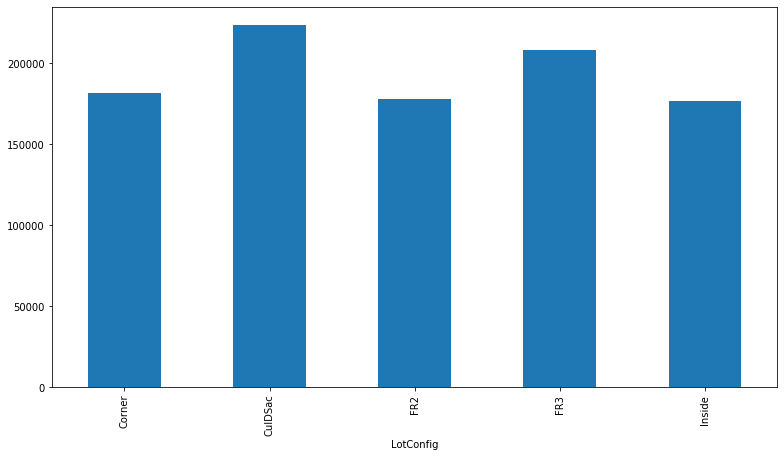

In [78]:
plt.figure(figsize=(13,7))

house_train.groupby('LotConfig')['SalePrice'].mean().plot(kind='bar')

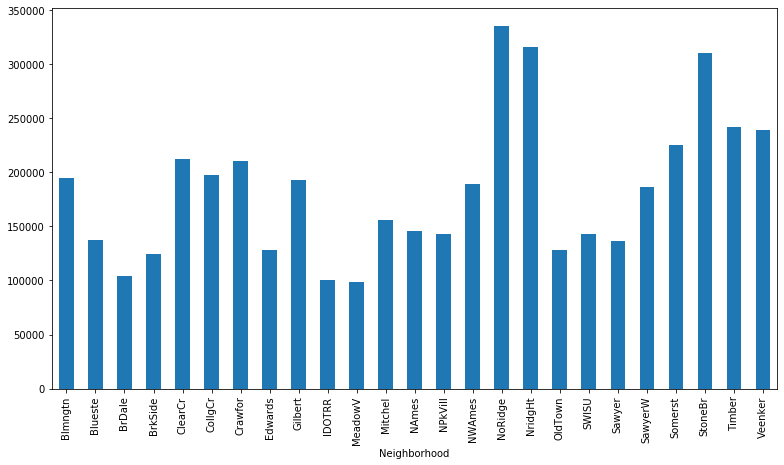

In [79]:
plt.figure(figsize=(13,7))
house_train.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')

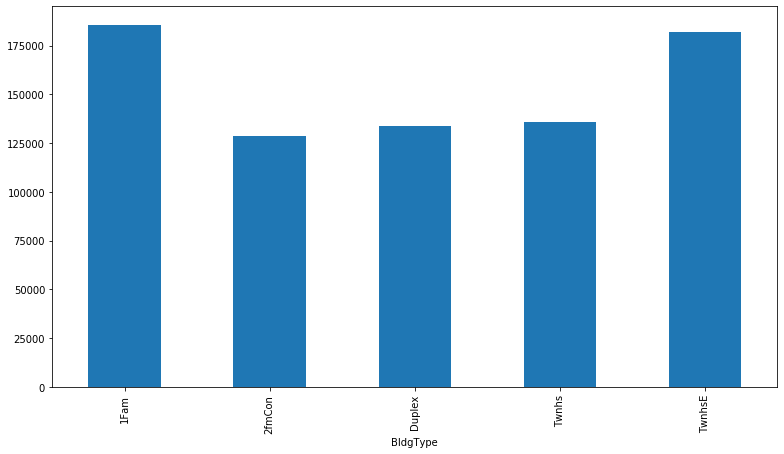

In [80]:
plt.figure(figsize=(13,7))

house_train.groupby('BldgType')['SalePrice'].mean().plot(kind='bar')

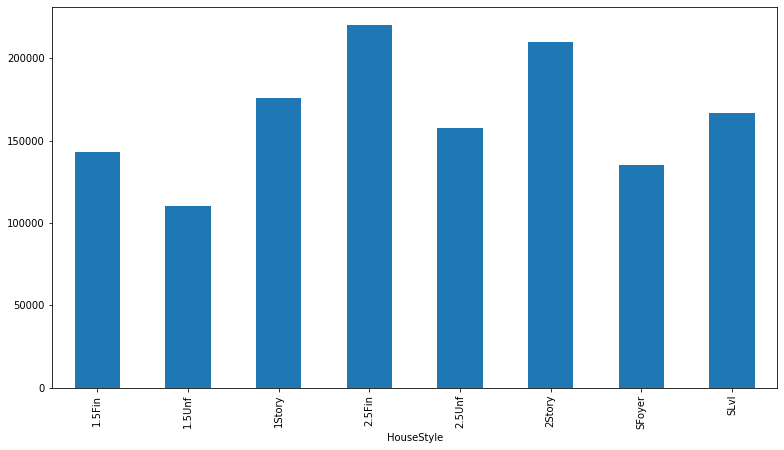

In [81]:
plt.figure(figsize=(13,7))

house_train.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')

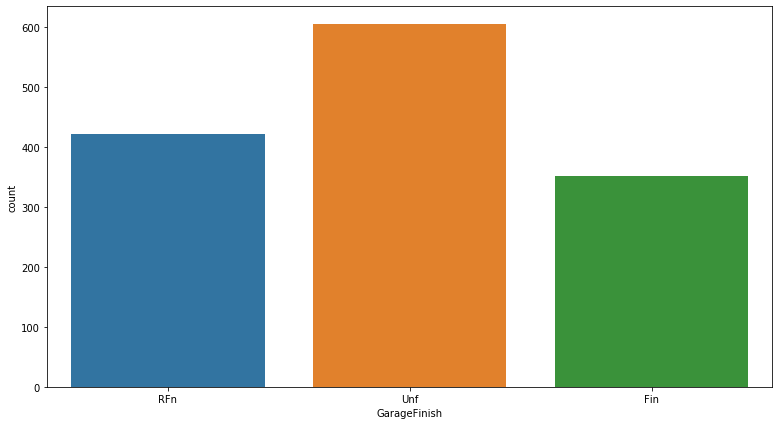

In [82]:
plt.figure(figsize=(13,7))

sns.countplot(house_train.GarageFinish)

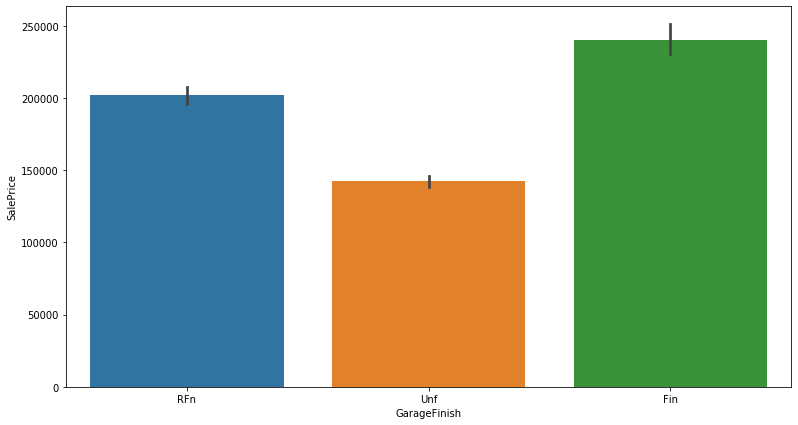

In [83]:
plt.figure(figsize=(13,7))

sns.barplot(house_train.GarageFinish ,house_train.SalePrice)

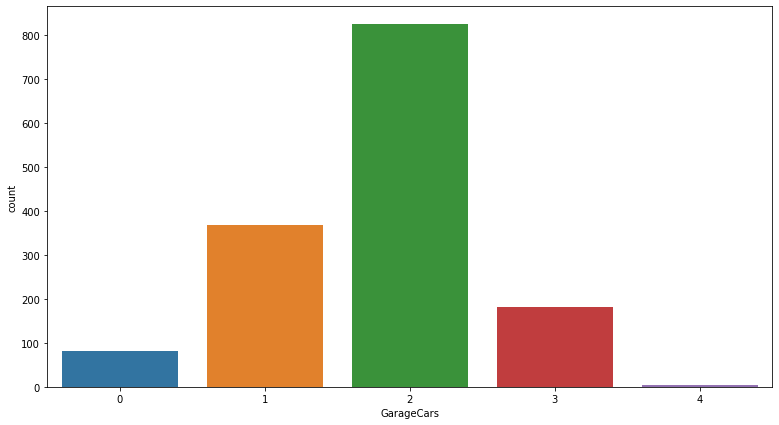

In [84]:
plt.figure(figsize=(13,7))

sns.countplot(house_train.GarageCars)

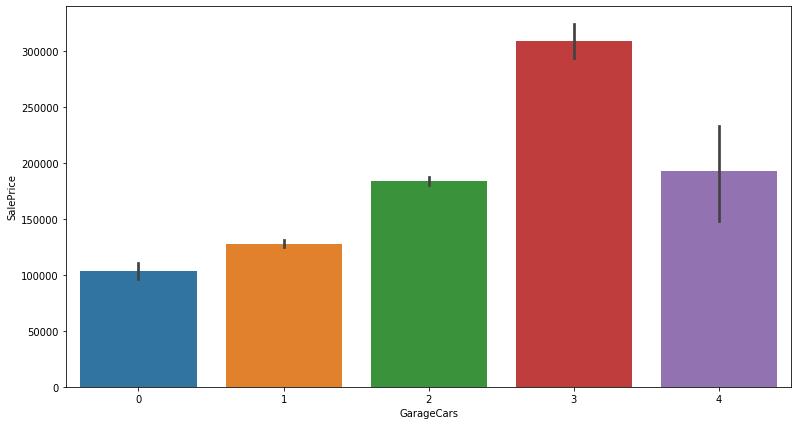

In [85]:
plt.figure(figsize=(13,7))

sns.barplot(house_train.GarageCars ,house_train.SalePrice)

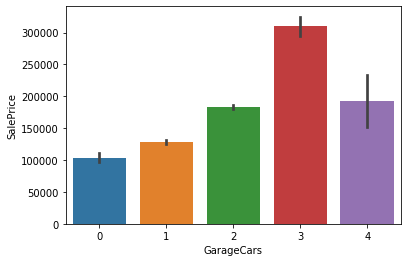

In [86]:
sns.barplot(house_train.GarageCars ,house_train.SalePrice)

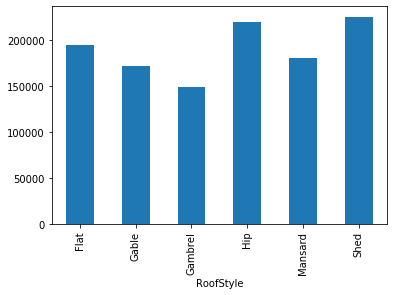

In [87]:
# Check with owner 
house_train.groupby('RoofStyle')['SalePrice'].mean().plot(kind='bar')

In [88]:
# Check with owner 

house_train.SalePrice[house_train['RoofStyle'] == 'Gambrel'].median()

139000.0

In [89]:
house_train.SalePrice[house_train['RoofStyle'] == 'Hip'].median()

176500.0

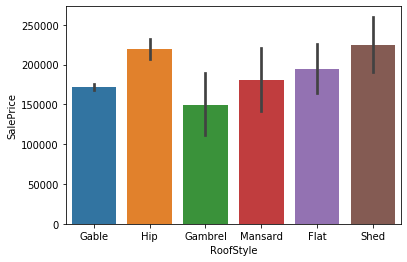

In [90]:
sns.barplot(house_train.RoofStyle ,house_train.SalePrice)

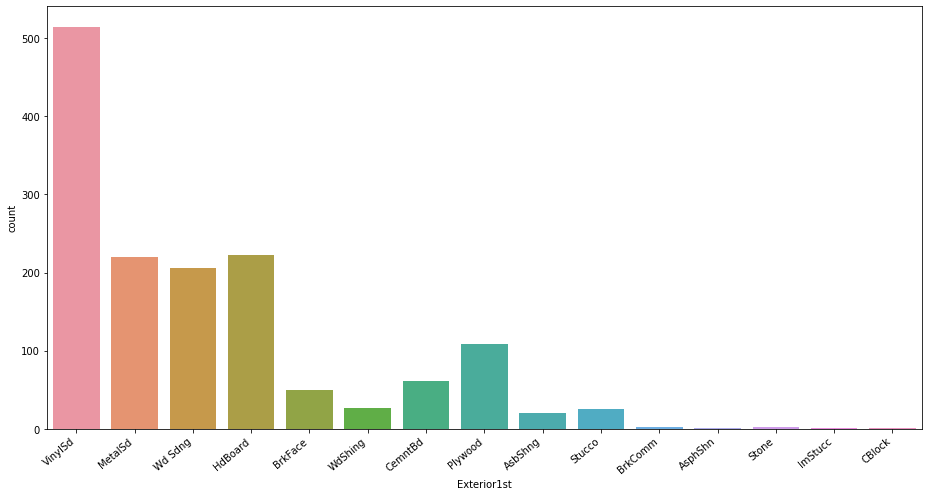

In [91]:
plt.figure(figsize=(13,7))

ax = sns.countplot(house_train.Exterior1st)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

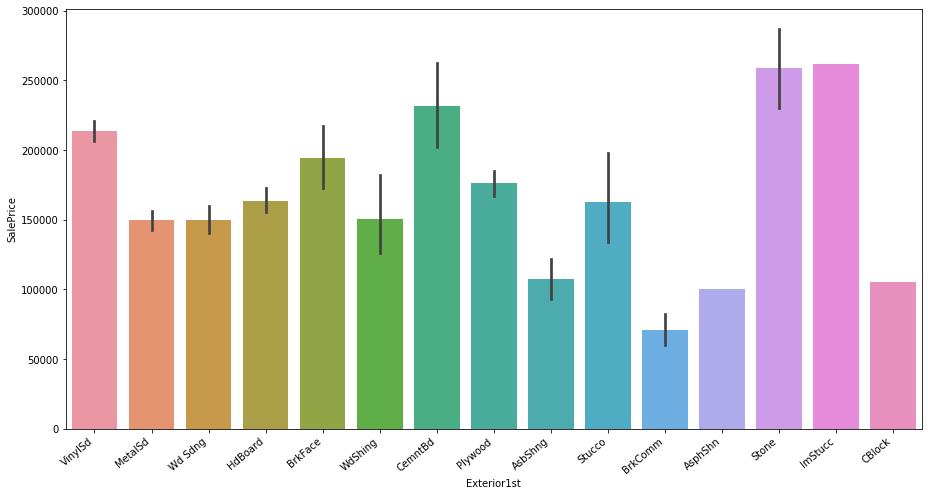

In [92]:
plt.figure(figsize=(13,7))

ax = sns.barplot(house_train.Exterior1st ,house_train.SalePrice)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<font size="5">Modeling </font>


In [93]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [94]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X,y)
print('Linear Regression score for whole data as training:', lr.score(X,y))

Linear Regression score for whole data as training: 0.8898608060766311


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=.2, random_state=42)

In [96]:
lr_tt = LinearRegression()
lr_tt.fit(X_train, y_train)
print('Linear Regression score with train_test_split')
print('train score', lr_tt.score(X_train, y_train))
print('test score', lr_tt.score(X_test, y_test))

Linear Regression score with train_test_split
train score 0.8908157043911777
test score 0.8676697383608196


In [97]:
ss = StandardScaler() # Scale our data
ss.fit(X_train)

X_train_s = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)



In [98]:
lrs = LinearRegression()
lrs.fit(X_train_s, y_train)
print('Training score after scaling',lrs.score(X_train_s, y_train))
print('Testing score after scaling',lrs.score(X_test_s, y_test))

Training score after scaling 0.8870676846236614
Testing score after scaling -3.880631949816334e+23


In [99]:
ls = Lasso()
ls.fit(X_train_s, y_train)
print('Lasso training score:', ls.score(X_train_s, y_train))
print('Lasso testing score:',ls.score(X_test_s, y_test))

Lasso training score: 0.8907229105919277
Lasso testing score: 0.8675348627174344


In [100]:
alpha = np.arange(0.001, 1000, 0.5)
grs = GridSearchCV(ls,  {'alpha': alpha}, n_jobs=-1)
grs.fit(X_train_s, y_train)

print('Best score', grs.best_score_)
print('Best alpha',grs.best_params_)

Best score 0.8127118214318522
Best alpha {'alpha': 444.501}


In [101]:
lasso_alphas = np.arange(1,200, 0.05)
lscv = LassoCV(cv=3,alphas=lasso_alphas, n_jobs=-1)
lscv.fit(X_train_s, y_train)

print('LassoCV training score',lscv.score(X_train_s, y_train))
print('LassoCV testing score',lscv.score(X_test_s, y_test))

LassoCV training score 0.8861727913634472
LassoCV testing score 0.8688006639795746


In [102]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=10)

In [103]:
scaler = StandardScaler()

scaler.fit(X)

Xs = pd.DataFrame(ss.transform(X), columns=X.columns)
X_target_s = pd.DataFrame(ss.transform(h_test), columns=h_test.columns)

rfr.fit(Xs, y)
print('Random Forest Regressor score:', rfr.score(Xs, y))

Random Forest Regressor score: 0.9747221084243386


In [104]:
n_estimatorss = np.arange(1,200, 10)
max_depthh = np.arange(1,30,3)
grd = GridSearchCV(rfr, {'n_estimators' :n_estimatorss, 'max_depth' : max_depthh }, n_jobs=-1)

grd.fit(Xs, y)
print('The best parameter is:', grd.best_params_)
print('The best score is: ', grd.best_score_)

The best parameter is: {'max_depth': 16, 'n_estimators': 71}
The best score is:  0.8534441441978243


In [105]:
submission = pd.DataFrame()
temp_list = []
for i in range(1461, 2920):
    temp_list.append(i)


In [106]:
submission['Id'] = temp_list
submission.head()
submission['SalePrice'] = rfr.predict(X_target_s)

submission.set_index('Id', inplace=True)


In [107]:
rfr.predict(X_target_s)

array([130003.83507785, 155012.93421344, 173000.98950674, ...,
       156317.6424774 , 110142.88805139, 223320.86424357])

In [108]:
submission.to_csv('submission.csv')

## 

In [109]:
lscv1 = LassoCV()
lscv1.fit(Xs, y)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [110]:
lscv1.score(Xs, y)

0.8800301286833238

In [111]:
alphaa = np.arange(1, 100, 1)
grd = GridSearchCV(lscv1, {'n_alphas': alphaa}, n_jobs=-1)
grd.fit(Xs, y)

print('Best Score is:',grd.best_score_)
print('Best parameter is:', grd.best_params_)

Best Score is: 0.8383236233843032
Best parameter is: {'n_alphas': 5}


In [123]:
del lasso_submission

In [126]:

lasso_submission = pd.DataFrame()
lasso_submission['Id'] = temp_list 

In [127]:
lasso_submission['SalePrice'] = grd.predict(X_target_s)

In [129]:
lasso_submission.set_index('Id', inplace=True)

In [131]:
lasso_submission.to_csv('Lasso_submission.csv')